In [1]:
%run datasets.py

## k-Nearest Neighbors : Classification

In [2]:
#The dataset we are using is a set of points which have either the label 0 or 1.
X, y = make_forge()
print("First 5 rows of X")
print(X[:5]) # first 5 elements
print("First 5 rows of y")
print(y[:5]) # first 5 elements
print("There are", len(X), "elements in X.") 

First 5 rows of X
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]]
First 5 rows of y
[1 0 1 0 0]
There are 26 elements in X.


In [3]:
import matplotlib.pyplot as plt

# y contains either 0 or 1 for each point
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Learning a Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#separating our dataset into a training and a test part
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Kn model
model = KNeighborsClassifier(n_neighbors=3)

In [5]:
# training
model.fit(X_train, y_train)

# evaluation
accuracy  = model.score(X_test, y_test)
print("Accuracy =", accuracy)
print("# Misclassified points =", (1 - accuracy) * len(X_test))

Accuracy = 0.857142857143
# Misclassified points = 1.0


We have an accuracy of 85.7%.

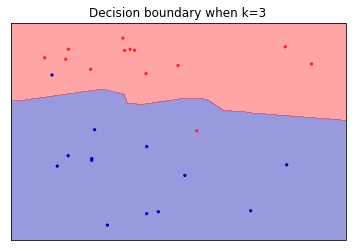

In [6]:
#Boundary

%run plots.py
plot_2d_separator(model, X, y, fill=True, eps=0.5, alpha=0.4)
plt.title("Decision boundary when k=3")
plt.show()


### Real Dataset

In [7]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR) 
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print(cancer.data.shape)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

(569, 30)


In [9]:
model_breast = KNeighborsClassifier(n_neighbors=6)
model_breast.fit(X_train, y_train)


accuracy_breast = model_breast.score(X_test, y_test)
print("Accuracy on breast cancer =", accuracy_breast)

Accuracy on breast cancer = 0.923076923077


## k-Nearest Neighbors : Regression

In [10]:
X, y = make_wave(40)

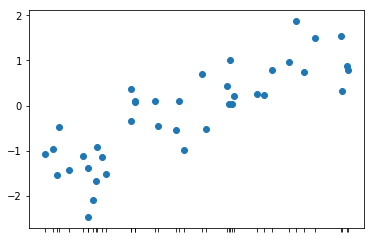

In [11]:
plt.scatter(X, y)
plt.xticks(X, " ")
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor

# create train + test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# create regression models, train and evaluate
regmodel_2 = KNeighborsRegressor(n_neighbors=2)
regmodel_2.fit(X_train, y_train)
print("Accuracy (k=2)", regmodel_2.score(X_test, y_test))

regmodel_3 = KNeighborsRegressor(n_neighbors=3)
regmodel_3.fit(X_train, y_train)
print("Accuracy (k=3)", regmodel_3.score(X_test, y_test))

regmodel_4 = KNeighborsRegressor(n_neighbors=4)
regmodel_4.fit(X_train, y_train)
print("Accuracy (k=4)", regmodel_4.score(X_test, y_test))

regmodel_5 = KNeighborsRegressor(n_neighbors=5)
regmodel_5.fit(X_train, y_train)
print("Accuracy (k=5)", regmodel_5.score(X_test, y_test))

regmodel_7 = KNeighborsRegressor(n_neighbors=7)
regmodel_7.fit(X_train, y_train)
print("Accuracy (k=7)", regmodel_7.score(X_test, y_test))

print("Best accuracy achieved when k=3")

Accuracy (k=2) 0.655749187554
Accuracy (k=3) 0.834417244625
Accuracy (k=4) 0.770418901846
Accuracy (k=5) 0.707138114401
Accuracy (k=7) 0.675213458768
Best accuracy achieved when k=3


## Linear models

Linear models are mostly used to do regression (predicting a value given a set of features). The predicted value $\hat{y}$ can be written as follows:

\begin{equation*}
\hat{y} = \sum_{k=1}^n w_k \times x_k + b
\end{equation*}

where $x_k$ are the features of the data points, $w_k$ and $b$ are the parameters learned by the linear model.

### Ordinary Least Squares

Ordinary Least Squares is the most classic linear method for regression. This model finds the $w$ and $b$ parameters that minimize the **mean squared error (MSE)** between predictions and the true value for the $m$ points in training dataset.
    
\begin{equation*}
MSE = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2
\end{equation*}

In [13]:
X, y = make_wave(n_samples=80)
print("X has", len(X), "points.")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X has 80 points.


In [14]:
from sklearn.linear_model import LinearRegression
# create model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print("Learned w:", model.coef_)
print("Learned b:", model.intercept_)
#The learned $w$ are in the coef_ attribute while the learned b are in the intercept_ attribute. 
#Since our data only has one feature, we only have one w.

Learned w: [ 0.53507564]
Learned b: 0.0837943622218


In [16]:

print("Model prediction =", model.predict([X_test[0]]))
print("Hand computed prediction =", model.coef_[0] * X_test[0] + model.intercept_)
print("Correct output =", y_test[0])

Model prediction = [ 1.59137414]
Hand computed prediction = [ 1.59137414]
Correct output = 1.05624279582


### Real Dataset

In [17]:
#We are going to predict the price of houses. 
#The data come from the housing market in Boston. We have 506 data points, and each one has 104 features
X, y = load_extended_boston()
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model_house = LinearRegression()
model_house.fit(X_train, y_train)
print("Predicted price =", model_house.predict([X_test[0]]))
print("Real price =", y_test[0])

Predicted price = [ 23.67394352]
Real price = 22.6


In [19]:
print(model_house.score(X_train, y_train))
print(model_house.score(X_test, y_test))
#We are overfitting because our training accuracy is very good but our test accuracy is bad.

0.952352643686
0.605775489294


### Regularization


Sometimes, the linear model can overfit. This means that it will be good on the training set, but not on the test set. One way to control overfitting is to add a regularization to our model. We can add a constraint to the objective being minimized by the model.

A L2 normalization that minimizes the norm 2 of the weights $w$ of the model. The name of this new type of model is called Ridge regression and it minimizes :

$$\begin{equation*}
MSE + Regularization = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2 + \lambda \left\lVert w \right\rVert ^2
\end{equation*}$$
$\lambda$ is a parameter to adjust the effect of regularization.

In [20]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
print("Training accuracy =", model_ridge.score(X_train, y_train))
print("Test accuracy =", model_ridge.score(X_test, y_test))

Training accuracy = 0.88605785604
Test accuracy = 0.752713960031


We have a better test accuracy and less difference between training and test accuracy. This means we have a more accurate model and have reduced the overfitting so this is a good improvement over the model which has no regularization.

In [21]:
model_ridge_01 = Ridge(alpha=0.1)
model_ridge_01.fit(X_train, y_train)
print("Training accuracy (alpha=0.1) =", model_ridge_01.score(X_train, y_train))
print("Test accuracy     (alpha=0.1) =", model_ridge_01.score(X_test, y_test))

model_ridge_02 = Ridge(alpha=0.2)
model_ridge_02.fit(X_train, y_train)
print("Training accuracy (alpha=0.2) =", model_ridge_02.score(X_train, y_train))
print("Test accuracy     (alpha=0.2) =", model_ridge_02.score(X_test, y_test))

model_ridge_05 = Ridge(alpha=0.5)
model_ridge_05.fit(X_train, y_train)
print("Training accuracy (alpha=0.5) =", model_ridge_05.score(X_train, y_train))
print("Test accuracy     (alpha=0.5) =", model_ridge_05.score(X_test, y_test))

model_ridge_2 = Ridge(alpha=2)
model_ridge_2.fit(X_train, y_train)
print("Training accuracy (alpha=2)   =", model_ridge_2.score(X_train, y_train))
print("Test accuracy     (alpha=2)   =", model_ridge_2.score(X_test, y_test))

Training accuracy (alpha=0.1) = 0.928578208201
Test accuracy     (alpha=0.1) = 0.771793368884
Training accuracy (alpha=0.2) = 0.920277627044
Test accuracy     (alpha=0.2) = 0.774678355594
Training accuracy (alpha=0.5) = 0.904050883736
Test accuracy     (alpha=0.5) = 0.767453031652
Training accuracy (alpha=2)   = 0.862108388768
Test accuracy     (alpha=2)   = 0.728417475961



When alpha (lambda in the formula) is increased, the regularization is more effective hence the gap between training and test accuracy is reduced. We are preventing overfitting as we increase alpha.

But when alpha is too big, the model tries to minimize the norm of W more than the MSE. The performance starts to become bad. The main idea is to find the best alpha that maximizes the performance of our model.

### Linear Models for classification


In [22]:
X, y = make_forge(504)
print("X has", len(X), "points.")

X has 500 points.


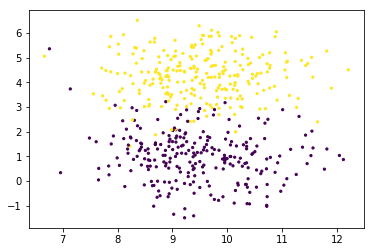

In [23]:
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training set has", len(X_train), "points.")
print("Test     set has", len(X_test), "points.")

# then we can create a model
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))

Training set has 375 points.
Test     set has 125 points.
Model accuracy: 0.928


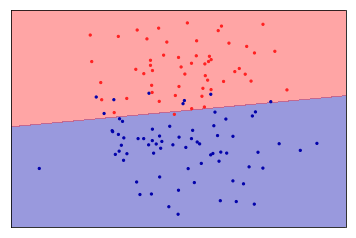

In [25]:
plot_2d_separator(model, X_test,y_test, fill=True, eps=0.5, alpha=0.4)

In [26]:
is_misclassified = model.predict(X_test) != y_test

n_misclassified = sum(is_misclassified)
print("Number of misclassified points:", n_misclassified)

Number of misclassified points: 9


Model 1
  C = 0.001
  Accuracy =  0.864
  Misclassified =  17
Model 2
  C = 0.1
  Accuracy =  0.936
  Misclassified =  8
Model 3
  C = 5
  Accuracy =  0.936
  Misclassified =  8
Model 4
  C = 100
  Accuracy =  0.92
  Misclassified =  10


Text(0.5,1,'C = 100 / Acc = 0.92')

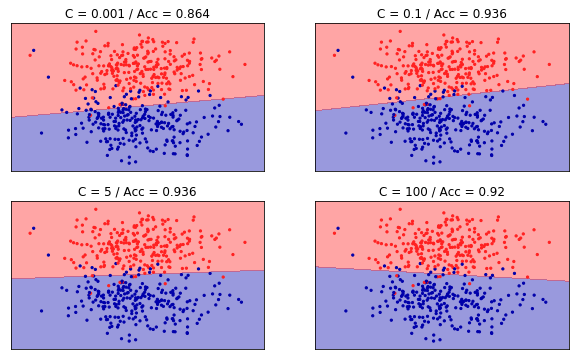

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# model 1
c = 0.001
model_1 = LogisticRegression(C=c)
model_1.fit(X_train, y_train)
acc = model_1.score(X_test, y_test)
print("Model 1")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_1.predict(X_test) != y_test))
plot_2d_separator(model_1, X, y, ax=ax[0][0],
                  fill=True, eps=0.5, alpha=0.4)
ax[0][0].set_title("C = {} / Acc = {}".format(c, acc))

# model 2
c = 0.1
model_2 = LogisticRegression(C=c)
model_2.fit(X_train, y_train)
acc = model_2.score(X_test, y_test)
print("Model 2")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_2.predict(X_test) != y_test))
plot_2d_separator(model_2, X, y, ax=ax[0][1],
                  fill=True, eps=0.5, alpha=0.4)
ax[0][1].set_title("C = {} / Acc = {}".format(c, acc))

# model 3
c = 5
model_3 = LogisticRegression(C=c)
model_3.fit(X_train, y_train)
acc = model_3.score(X_test, y_test)
print("Model 3")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_3.predict(X_test) != y_test))
plot_2d_separator(model_3, X, y, ax=ax[1][0],
                  fill=True, eps=0.5, alpha=0.4)
ax[1][0].set_title("C = {} / Acc = {}".format(c, acc))

# model 4
c = 100
model_4 = LogisticRegression(C=c)
model_4.fit(X_train, y_train)
acc = model_4.score(X_test, y_test)
print("Model 4")
print("  C =", c)
print("  Accuracy = ", acc)
print("  Misclassified = ", 
      sum(model_4.predict(X_test) != y_test))
plot_2d_separator(model_4, X, y, ax=ax[1][1],
                  fill=True, eps=0.5, alpha=0.4)
ax[1][1].set_title("C = {} / Acc = {}".format(c, acc))

The parameter C is the inverse of the regularization strength. This means that when C=0.001, the regularization is stronger than when C=100. With the decision boundaries, we can see that when the regularization is weak (C=100), the decision boudary is close to our data (the direction of the boundary is almost the same as the data, like a \ line) but when it is strong (C=0.001), the boundary does not align with the data (like a / line). Like we said before, we need to find a C that balance the effect of the regularization. In our case, with C=5, we have a good accuracy and a boundary close to the horizontal line.

In [28]:
print("Model 1")
print("  w =", model_1.coef_)
print("  b =", model_1.intercept_)
print("Model 2")
print("  w =", model_2.coef_)
print("  b =", model_2.intercept_)
print("Model 3")
print("  w =", model_3.coef_)
print("  b =", model_3.intercept_)
print("Model 4")
print("  w =", model_4.coef_)
print("  b =", model_4.intercept_)

Model 1
  w = [[-0.04564418  0.22321363]]
  b = [-0.00596641]
Model 2
  w = [[-0.44281899  1.75424246]]
  b = [-0.2351185]
Model 3
  w = [[-0.21522957  2.67982853]]
  b = [-4.80308169]
Model 4
  w = [[ 0.39988928  2.98883687]]
  b = [-11.4855999]


c has an effect on the values of $w$ and $b$. We can see that, the stronger the regularization, the lower the values of $w$ and $b$. This is what we were expecting because the regularization tries to minimize the norm $\left\lVert W \right\rVert$. So if the model needs to optimize a lot the norm of $W$, its option is to decrease the values of $w$ and $b$.

### Decision Trees

In [29]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
training_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

#overfitting 

Training accuracy: 1.0
Test accuracy: 0.881118881119


In [32]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

training_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.992957746479
Test accuracy: 0.916083916084


Reducing the maximum depth of our decision tree model helps to prevent overfitting.

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="breast_tree.dot",class_names=["malignant", "benign"],feature_names=cancer.feature_names,impurity=False,filled=True)
                

In [34]:
import graphviz
with open("breast_tree.dot") as f:
    breast_tree = f.read()
    graphviz.Source(breast_tree)

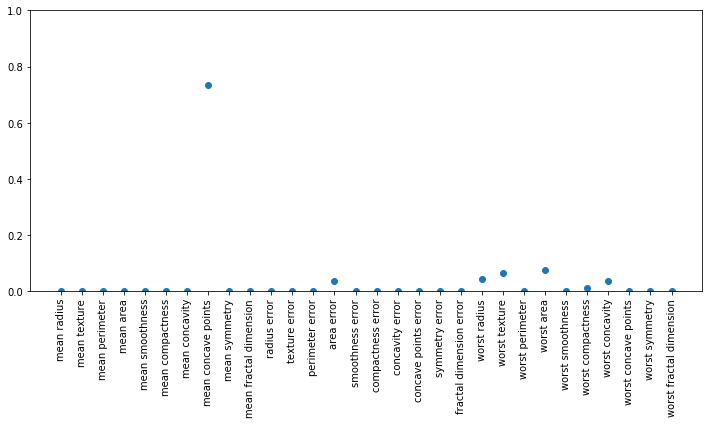

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0,1)
fig.tight_layout() # so we can read all labels on x-axis

"Mean concave points" and "worst area" are the most discriminative attributes in the decision tree

## Support Vector Machine

In [36]:
X, y = make_forge(304)
print("X has", len(X), "points.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)
print("X_train has", len(X_train), "points.")
print("X_test has", len(X_test), "points.")

X has 300 points.
X_train has 270 points.
X_test has 30 points.


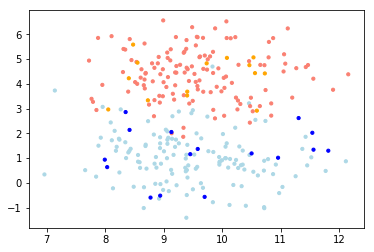

In [37]:

colors_train = np.where(y_train == 1, "salmon", "lightblue")

plt.scatter(X_train[:,0], X_train[:,1], c=colors_train, s=10)

colors_test = np.where(y_test == 1, "orange", "blue")
plt.scatter(X_test[:,0], X_test[:,1], c=colors_test, s=10)

plt.show()

Accuracy of linear SVC = 0.933333333333
Class 0: 19 support vectors
Class 1: 20 support vectors


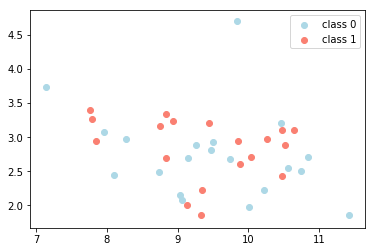

In [38]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy of linear SVC =", accuracy)

print("Class 0:", model.n_support_[0], "support vectors")
print("Class 1:", model.n_support_[1], "support vectors")


plt.scatter(
    model.support_vectors_[:model.n_support_[1], 0],
    model.support_vectors_[:model.n_support_[1], 1],
    c="lightblue", label="class 0")
plt.scatter(
    model.support_vectors_[model.n_support_[1]:, 0],
    model.support_vectors_[model.n_support_[1]:, 1],
    c="salmon", label="class 1")
    
plt.legend()
plt.show()

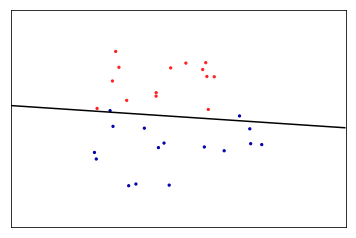

2/30 misclassified points


In [39]:
plot_2d_separator(model, X_test, y_test)
plt.show()

n_misclassified = sum(model.predict(X_test) != y_test)
print("{}/{} misclassified points".format(
      n_misclassified, len(X_test)))

The dataset is not linearly separable because we cannot separate the red and blue points with a line. It might be possible to improve the accuracy since a slight modification (rotation of 5 degrees, anticlockwise) of the line could result in only one misclassified point (one blue point classified as a red point).

Model 1 (C=100)
  Train accuracy = 0.937037037037
  Test  accuracy = 0.933333333333


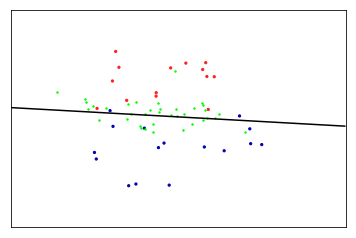

Model 2 (C=10)
  Train accuracy = 0.937037037037
  Test  accuracy = 0.933333333333


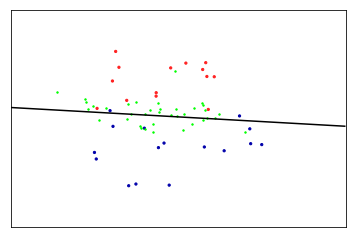

Model 3 (C=0.1)
  Train accuracy = 0.940740740741
  Test  accuracy = 0.933333333333


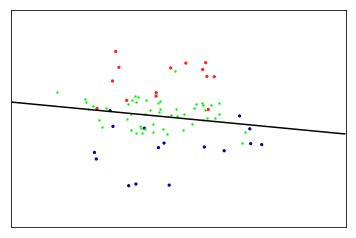

Model 4 (C=0.01)
  Train accuracy = 0.940740740741
  Test  accuracy = 0.933333333333


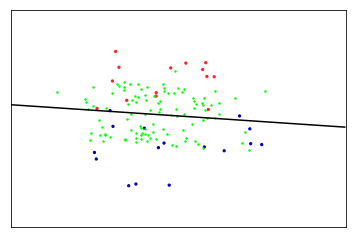

Model 5 (C=0.001)
  Train accuracy = 0.944444444444
  Test  accuracy = 1.0


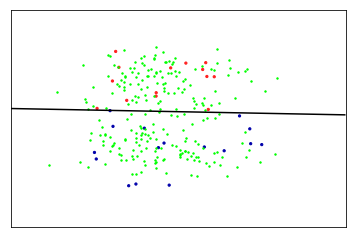

In [40]:
model_1 = SVC(kernel="linear", C=100)
model_1.fit(X_train, y_train)
print("Model 1 (C=100)")
print("  Train accuracy =", model_1.score(X_train, y_train))
print("  Test  accuracy =", model_1.score(X_test, y_test))
plot_2d_separator(model_1, X_test, y_test)
plt.scatter(model_1.support_vectors_[:,0],
            model_1.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_2 = SVC(kernel="linear", C=10)
model_2.fit(X_train, y_train)
print("Model 2 (C=10)")
print("  Train accuracy =", model_2.score(X_train, y_train))
print("  Test  accuracy =", model_2.score(X_test, y_test))
plot_2d_separator(model_2, X_test, y_test)
plt.scatter(model_2.support_vectors_[:,0],
            model_2.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_3 = SVC(kernel="linear", C=0.1)
model_3.fit(X_train, y_train)
print("Model 3 (C=0.1)")
print("  Train accuracy =", model_3.score(X_train, y_train))
print("  Test  accuracy =", model_3.score(X_test, y_test))
plot_2d_separator(model_3, X_test, y_test)
plt.scatter(model_3.support_vectors_[:,0],
            model_3.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_4 = SVC(kernel="linear", C=0.01)
model_4.fit(X_train, y_train)
print("Model 4 (C=0.01)")
print("  Train accuracy =", model_4.score(X_train, y_train))
print("  Test  accuracy =", model_4.score(X_test, y_test))
plot_2d_separator(model_4, X_test, y_test)
plt.scatter(model_4.support_vectors_[:,0],
            model_4.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_5 = SVC(kernel="linear", C=0.001)
model_5.fit(X_train, y_train)
print("Model 5 (C=0.001)")
print("  Train accuracy =", model_5.score(X_train, y_train))
print("  Test  accuracy =", model_5.score(X_test, y_test))
plot_2d_separator(model_5, X_test, y_test)
plt.scatter(model_5.support_vectors_[:,0],
            model_5.support_vectors_[:,1], c="lime", s=2)
plt.show()

The parameter C represents the weight of each misclassified point. When C is high, the model tries to avoid as much as possible a misclassified point, even if it implies to have a smaller margin. We can see that when C=100 or when C=10, the number of support vectors (in green) is small, and the distance between the black line and the furthest support vector is low (this distance is the margin).

When C is low, the model tries to have a large margin, instead of trying to reduce the number of misclassified points (when C is low, the weight of an error is also low). We can see that with C=0.001, the number of support vectors is high (a lot of green points) and so is the margin. In this case, the test accuracy is perfect.

The complexity of a SVM can be represented by the number of support vectors needed to draw the separating line. We can see that when C is low, there are a lot of support vectors, so our model is complex. And because we have a perfect test accuracy, we can suppose that our model is overfitting (too close to our dataset, not very able to generalize to unseen new data points). By increasing the value of C, we reduce the number of required support vectors, so is the complexity of our model. We are less likely to be overfitting.

In [41]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

model_breast = SVC(kernel="linear", C=10, random_state=0)
model_breast.fit(X_train, y_train)
print("Train accuracy:", model_breast.score(X_train, y_train))
print("Test  accuracy:", model_breast.score(X_test, y_test))


Train accuracy: 0.976525821596
Test  accuracy: 0.965034965035


### Neural Network

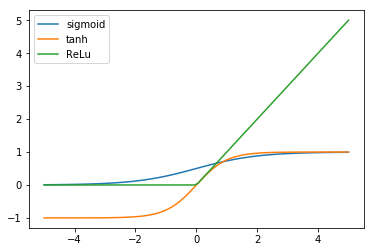

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
sigmoid_x = sigmoid(x)
tanh_x    = np.tanh(x)
ReLu_x    = np.maximum(0, x)

figure = plt.figure()
plt.plot(x, sigmoid_x, label="sigmoid")
plt.plot(x, tanh_x,    label="tanh")
plt.plot(x, ReLu_x,    label="ReLu")
plt.legend()
plt.show()

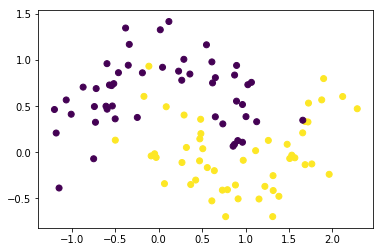

In [43]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train accuracy: 0.853333333333
Test  accuracy: 0.84


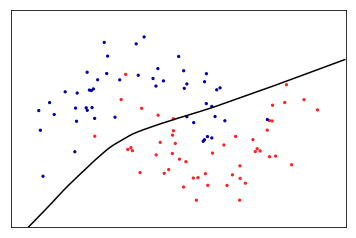

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neural_network import MLPClassifier

network = MLPClassifier()
network.fit(X_train, y_train)
print("Train accuracy:", network.score(X_train, y_train))
print("Test  accuracy:", network.score(X_test, y_test))
plot_2d_separator(network, X, y)
plt.show()

The network has not converged after 200 iterations

In [45]:
# 3 types of solver are available in the MLPClassifier class:
#   - adam
#   - sgd
#   - lbfgs

nn_adam = MLPClassifier(solver="adam")
nn_adam.fit(X_train, y_train)
print("Adam")
print("  Train accuracy:", nn_adam.score(X_train, y_train))
print("  Test  accuracy:", nn_adam.score(X_test, y_test))

nn_sgd = MLPClassifier(solver="sgd")
nn_sgd.fit(X_train, y_train)
print("SGD")
print("  Train accuracy:", nn_sgd.score(X_train, y_train))
print("  Test  accuracy:", nn_sgd.score(X_test, y_test))

nn_lbfgs = MLPClassifier(solver="lbfgs")
nn_lbfgs.fit(X_train, y_train)
print("LBFGS")
print("  Train accuracy:", nn_lbfgs.score(X_train, y_train))
print("  Test  accuracy:", nn_lbfgs.score(X_test, y_test))

Adam
  Train accuracy: 0.866666666667
  Test  accuracy: 0.84
SGD
  Train accuracy: 0.813333333333
  Test  accuracy: 0.84
LBFGS
  Train accuracy: 1.0
  Test  accuracy: 0.84


c:\users\david\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The 3 networks have almost the same test accuracy. The dataset is not large enough to make any conclusions on the performance increase/degradation when we swicth the training algorithm. For LBFGS algorithm, we do not have any convergence warning message. As explained  small datasets LBFGS can converge faster.

In [46]:
nn_2layers = MLPClassifier(hidden_layer_sizes=(10, 10),
                           max_iter=5000, random_state=0)
nn_2layers.fit(X_train, y_train)
print("2 hidden layers of 10 neurons")
print("  Train accuracy:", nn_2layers.score(X_train, y_train))
print("  Test  accuracy:", nn_2layers.score(X_test, y_test))

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.

nn_1 = MLPClassifier(hidden_layer_sizes=(1000),
                     max_iter=5000, random_state=0)
nn_1.fit(X_train, y_train)
print("1 hidden layer of 1000 neurons")
print("  Train accuracy:", nn_1.score(X_train, y_train))
print("  Test  accuracy:", nn_1.score(X_test, y_test))

nn_2 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5),
                     max_iter=5000, random_state=0)
nn_2.fit(X_train, y_train)
print("4 hidden layers of 5 neurons")
print("  Train accuracy:", nn_2.score(X_train, y_train))
print("  Test  accuracy:", nn_2.score(X_test, y_test))

nn_3 = MLPClassifier(hidden_layer_sizes=(20,20),
                     max_iter=5000, random_state=0)
nn_3.fit(X_train, y_train)
print("2 hidden layers of 20 neurons")
print("  Train accuracy:", nn_3.score(X_train, y_train))
print("  Test  accuracy:", nn_3.score(X_test, y_test))

2 hidden layers of 10 neurons
  Train accuracy: 0.84
  Test  accuracy: 0.84
1 hidden layer of 1000 neurons
  Train accuracy: 0.986666666667
  Test  accuracy: 0.88
4 hidden layers of 5 neurons
  Train accuracy: 0.986666666667
  Test  accuracy: 0.88
2 hidden layers of 20 neurons
  Train accuracy: 0.986666666667
  Test  accuracy: 0.92


We can see that with 2 layers of 10 neurons, we have a better accuracy than with 1 layer of 100 neurons. In general, the only way to increase the accuracy of the model is to increase the number of neurons, because more neurons means that the model is more complex and can find non trivial boundaries. But having more layers is more efficient than having more neurons. If the activation function is non-linear, cascading this non-linearity can also create complex functions without requiring a lot of neurons.

We usually start with a large amount of neurons, and see if we can get a good accuracy. With one layer of 1000 neurons, we have a test accuracy of 0.88 and a train accuracy of almost 0.99. This model is clearly overfitting. To prevent overfitting, we can reduce the number of neurons, or create more layers. With 4 layers of 5 neurons, we have a the same test and train accuracy, so we are still overfitting. Finally, with only 2 layers of 20 neurons (so a total of 40 neurons), we have a test accuracy of 0.92. The overfitting has been reduced and the performance increased.

In [47]:
nn_ident = MLPClassifier(hidden_layer_sizes=(20,20),
                         activation="identity", 
                         max_iter=5000,
                         random_state=0)
nn_ident.fit(X_train, y_train)
print("Identity activation")
print("  Train accuracy:", nn_ident.score(X_train, y_train))
print("  Test  accuracy:", nn_ident.score(X_test, y_test))

# sigmoid
nn_sigm = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="logistic", 
                        max_iter=5000,
                        random_state=0)
nn_sigm.fit(X_train, y_train)
print("Sigmoid activation")
print("  Train accuracy:", nn_sigm.score(X_train, y_train))
print("  Test  accuracy:", nn_sigm.score(X_test, y_test))

# tanh
nn_tanh = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="tanh", 
                        max_iter=5000,
                        random_state=0)
nn_tanh.fit(X_train, y_train)
print("Tanh activation")
print("  Train accuracy:", nn_tanh.score(X_train, y_train))
print("  Test  accuracy:", nn_tanh.score(X_test, y_test))

# relu
nn_relu = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="relu", 
                        max_iter=5000,
                        random_state=0)
nn_relu.fit(X_train, y_train)
print("ReLu activation")
print("  Train accuracy:", nn_relu.score(X_train, y_train))
print("  Test  accuracy:", nn_relu.score(X_test, y_test))

Identity activation
  Train accuracy: 0.853333333333
  Test  accuracy: 0.84
Sigmoid activation
  Train accuracy: 0.506666666667
  Test  accuracy: 0.48
Tanh activation
  Train accuracy: 0.986666666667
  Test  accuracy: 0.84
ReLu activation
  Train accuracy: 0.986666666667
  Test  accuracy: 0.92


In this case, ReLu activations are the best. This can be exlained with the graphic representations of the activation functions. During backpropagation, gradient is transfered layer from layer in reverse order, but the gradient is multiplied by the value of the derivative of the activation function everytime it is transfered. The derivative of a function at a certain point is equal to the slope of the function at this same point. With ReLu, the slope is very high compared to sigmoid or tanh. So the gradient have larger values, and the model can have a faster convergence, and so better results. In general, we need to test every activate function because the result depends on the dataset.

**Tuning a neural network and testing (almost) every combinations of hyperparameters is time-consuming but is the key to have good performance with neural networks.**

## Unsupervised learning

PCA can be used as a pre-processing step before using supervised learning algorithms in order to improve accuracy or training speed. But sometimes, a simple pre-processing step like normalizing the data can bring a huge improvement.

In [48]:
# No normalization
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

model = SVC(C=100)
model.fit(X_train, y_train)
print("Accuracy =", model.score(X_test, y_test))

Accuracy = 0.629370629371


In [49]:
minima = np.min(cancer.data, axis=0)
maxima = np.max(cancer.data, axis=0)

for i in range(len(cancer.feature_names)):
    print("{:<25}: MIN = {:6.2f} / MAX = {:7.2f}".format(
          cancer.feature_names[i], minima[i], maxima[i]))

mean radius              : MIN =   6.98 / MAX =   28.11
mean texture             : MIN =   9.71 / MAX =   39.28
mean perimeter           : MIN =  43.79 / MAX =  188.50
mean area                : MIN = 143.50 / MAX = 2501.00
mean smoothness          : MIN =   0.05 / MAX =    0.16
mean compactness         : MIN =   0.02 / MAX =    0.35
mean concavity           : MIN =   0.00 / MAX =    0.43
mean concave points      : MIN =   0.00 / MAX =    0.20
mean symmetry            : MIN =   0.11 / MAX =    0.30
mean fractal dimension   : MIN =   0.05 / MAX =    0.10
radius error             : MIN =   0.11 / MAX =    2.87
texture error            : MIN =   0.36 / MAX =    4.88
perimeter error          : MIN =   0.76 / MAX =   21.98
area error               : MIN =   6.80 / MAX =  542.20
smoothness error         : MIN =   0.00 / MAX =    0.03
compactness error        : MIN =   0.00 / MAX =    0.14
concavity error          : MIN =   0.00 / MAX =    0.40
concave points error     : MIN =   0.00 / MAX = 

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cancer.data)

same_min = np.isclose(scaler.data_min_, minima)
print("Scaler found same minima ?", np.all(same_min))
same_max = np.isclose(scaler.data_max_, maxima)
print("Scaler found same maxima ?", np.all(same_max))

# Rescaling
X_train_scaled = scaler.transform(X_train)

print("\nMinima of X_train_scaled")
print(np.min(X_train_scaled, axis=0))
print("\nMaxima of X_train_scaled")
print(np.max(X_train_scaled, axis=0))

Scaler found same minima ? True
Scaler found same maxima ? True

Minima of X_train_scaled
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00057461  0.
  0.00079567  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]

Maxima of X_train_scaled
[ 1.          0.81501522  1.          1.          0.83118173  0.89571192
  1.          1.          1.          1.          1.          1.          1.
  1.          0.7348472   0.78219725  1.          1.          0.75389768
  1.          1.          1.          1.          1.          1.          1.
  1.          0.9975945   1.          1.        ]


In [51]:
X_test_scaled = scaler.transform(X_test)
svc_minmax = SVC(C=100)
svc_minmax.fit(X_train_scaled, y_train)
print("Accuracy =", svc_minmax.score(X_test_scaled, y_test))

Accuracy = 0.965034965035


In [53]:
# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

scaler_maxabs = MaxAbsScaler()
scaler_maxabs.fit(cancer.data)

X_train_scaled_maxabs = scaler_maxabs.transform(X_train)
X_test_scaled_maxabs  = scaler_maxabs.transform(X_test)

svc_maxabs = SVC(C=100)
svc_maxabs.fit(X_train_scaled_maxabs, y_train)
print("[MaxAbsScaler] accuracy  =", svc_maxabs.score(
    X_test_scaled_maxabs, y_test))

# RobustScaler
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
scaler_robust.fit(cancer.data)

X_train_scaled_robust = scaler_robust.transform(X_train)
X_test_scaled_robust  = scaler_robust.transform(X_test)

svc_robust = SVC(C=100)
svc_robust.fit(X_train_scaled_robust, y_train)
print("[RobustScaler] accuracy  =", svc_robust.score(
    X_test_scaled_robust, y_test))

# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_standard.fit(cancer.data)

X_train_scaled_standard = scaler_standard.transform(X_train)
X_test_scaled_standard  = scaler_standard.transform(X_test)

svc_standard = SVC(C=100)
svc_standard.fit(X_train_scaled_standard, y_train)
print("[StandardScaler] accuracy  =", svc_standard.score(X_test_scaled_standard, y_test))

[MaxAbsScaler] accuracy  = 0.972027972028
[RobustScaler] accuracy  = 0.951048951049
[StandardScaler] accuracy  = 0.965034965035


In [54]:
np.set_printoptions(precision=3)
print("MinMaxScaler")
print("  Means:", X_train_scaled.mean(axis=0)[:5])
print("  Mins:", X_train_scaled.min(axis=0)[:5])
print("  Maxs:", X_train_scaled.max(axis=0)[:5])

print("MaxAbsScaler")
print("  Means:", X_train_scaled_maxabs.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_maxabs.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_maxabs.max(axis=0)[:5])

print("RobustScaler")
print("  Means:", X_train_scaled_robust.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_robust.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_robust.max(axis=0)[:5])

print("StandarScaler")
print("  Means:", X_train_scaled_standard.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_standard.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_standard.max(axis=0)[:5])

MinMaxScaler
  Means: [ 0.34   0.322  0.334  0.218  0.395]
  Mins: [ 0.  0.  0.  0.  0.]
  Maxs: [ 1.     0.815  1.     1.     0.831]
MaxAbsScaler
  Means: [ 0.504  0.49   0.489  0.263  0.59 ]
  Mins: [ 0.248  0.247  0.232  0.057  0.322]
  Maxs: [ 1.     0.861  1.     1.     0.886]
RobustScaler
  Means: [ 0.193  0.07   0.204  0.296  0.026]
  Mins: [-1.566 -1.622 -1.467 -1.125 -2.284]
  Maxs: [ 3.613  2.659  3.535  5.381  2.58 ]
StandarScaler
  Means: [ 0.009 -0.013  0.007  0.01   0.   ]
  Mins: [-2.03  -2.229 -1.985 -1.454 -3.112]
  Maxs: [ 3.971  3.379  3.976  5.251  3.44 ]


The MaxAbsScaler rescale the data so that the maximum absolute value is 1. Every value are positive because the original dataset have positive values. But the minimum is not 0, so the mean value for each feature is higher compared to the MinMaxScaler.

The RobustScaler and StandardScaler have other kind of transformation. We can see that the scaled data have some negative values, even if none of them were negative in the original dataset.

## Principal Component Analysis

In [55]:
X_scaled = scaler_standard.transform(cancer.data)

In [56]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
X_pca = pca.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (569, 30)
Shape after PCA: (569, 2)


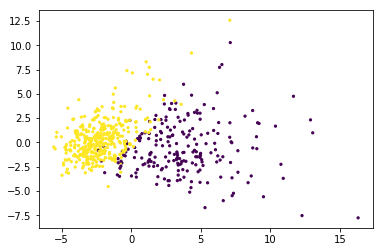

In [58]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer.target, s=5)
plt.show()

Shape before PCA: (569, 30)
Shape after PCA: (569, 3)


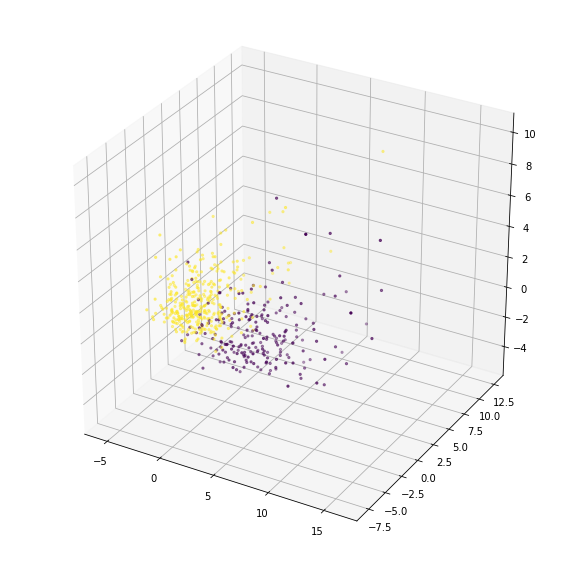

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_3d.fit(X_scaled)
X_pca_3d = pca_3d.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca_3d.shape)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
           c=cancer.target, s=5)
plt.show()